# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

Original testing accuracy= 0.9797000288963318

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
model = Sequential()
# input layer
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=128,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=64,
                kernel_initializer='normal',
                activation='relu'))

# output layer
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=30, batch_size=64,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 49us/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1543 - val_accuracy: 0.9821
Epoch 2/30
48000/48000 [==============================] - 2s 45us/step - loss: 3.5140e-04 - accuracy: 0.9999 - val_loss: 0.1602 - val_accuracy: 0.9825
Epoch 3/30
48000/48000 [==============================] - 2s 47us/step - loss: 1.4185e-04 - accuracy: 1.0000 - val_loss: 0.1581 - val_accuracy: 0.9829
Epoch 4/30
48000/48000 [==============================] - 2s 48us/step - loss: 3.3107e-05 - accuracy: 1.0000 - val_loss: 0.1606 - val_accuracy: 0.9833
Epoch 5/30
48000/48000 [==============================] - 2s 48us/step - loss: 2.0460e-05 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9832
Epoch 6/30
48000/48000 [==============================] - 2s 49us/step - loss: 1.3476e-05 - accuracy: 1.0000 - val_loss: 0.1675 - val_accuracy: 0.9832
Epoch 7/30
48000/48000 [========================

# 以圖形顯示訓練過程

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

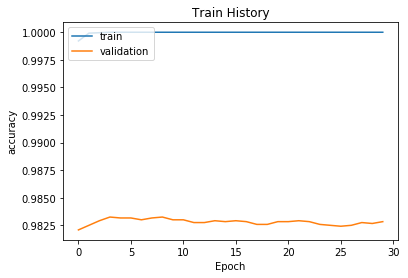

In [21]:
show_train_history(train_history,'accuracy','val_accuracy')

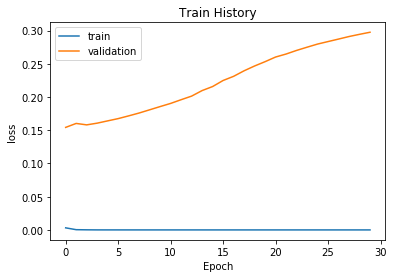

In [22]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 25us/step

accuracy= 0.983299970626831
